**OBLIGATORIO FINAL G445 - GRUPO 8**
<br>**INTEGRANTES:**
<br>
<br>*Theo Pereira, 5703834-3, theopereira2001@gmail.com*
<br>*Carlos Píriz, 4298784-4, piriz.carlos@gmail.com*
<br>*Gabriel	Better,3138871-2, gabrielbetter@gmail.com*


In [2]:
### Importacion de librerias ###

# Sistema
import os

# Tratamiento de datos
import pandas as pd
import numpy as np
import datetime as dt
import math

# Visualizacion 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**PARTE 1 OBTENCION DE DATOS Y ACERCAMIENTO**

**Carga de datos**

In [3]:
# Carga del archivo superstore a dataframe
# Selecciono la columna Row ID, como indice ya que pareciera ser el identificador de fila, independiente de los datos
miPath = os.path.abspath("")
superstore = pd.read_csv(miPath+"/Superstore.csv")
superstore.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,Hon Deluxe Fabric Upholstered Stacking Chairs....,731.94
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,9575775.00
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22368.00


In [4]:
# Verificacion rapida de valores numericos
superstore.describe()

,Row ID,Postal Code,Sales
count,9801.000000,9787.000000,9.801000e+03
mean,4900.999898,55273.502299,1.033240e+05
std,2829.449151,32040.474490,5.219441e+05
min,1.000000,1040.000000,-3.286850e+05
25%,2451.000000,23223.000000,5.220000e+01
50%,4901.000000,58103.000000,5.894100e+02
75%,7351.000000,90008.000000,4.534400e+04
max,9800.000000,99301.000000,2.396266e+07


In [5]:
# Revision de las columnas
superstore.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [8]:
# Tipos de datos de las columnas
superstore.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object

In [9]:
# Cantidad filas, nulos columnas y tipos de datos
superstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9801 entries, 0 to 9800
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9801 non-null   int64  
 1   Order ID       9801 non-null   object 
 2   Order Date     9801 non-null   object 
 3   Ship Date      9801 non-null   object 
 4   Ship Mode      9801 non-null   object 
 5   Customer ID    9801 non-null   object 
 6   Customer Name  9801 non-null   object 
 7   Segment        9801 non-null   object 
 8   Country        9798 non-null   object 
 9   City           9801 non-null   object 
 10  State          9801 non-null   object 
 11  Postal Code    9787 non-null   float64
 12  Region         9801 non-null   object 
 13  Product ID     9801 non-null   object 
 14  Category       9801 non-null   object 
 15  Sub-Category   9801 non-null   object 
 16  Product Name   9801 non-null   object 
 17  Sales          9801 non-null   float64
dtypes: float

In [6]:
# Cantidad de filas y columnas
superstore.shape

(9801, 18)

In [14]:
superstore.ndim

2

**Acercamiento a los datos**

**Tratamos de indexar por 'Row ID', evaluando la columna**

In [15]:
superstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9801 entries, 0 to 9800
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9801 non-null   int64  
 1   Order ID       9801 non-null   object 
 2   Order Date     9801 non-null   object 
 3   Ship Date      9801 non-null   object 
 4   Ship Mode      9801 non-null   object 
 5   Customer ID    9801 non-null   object 
 6   Customer Name  9801 non-null   object 
 7   Segment        9801 non-null   object 
 8   Country        9798 non-null   object 
 9   City           9801 non-null   object 
 10  State          9801 non-null   object 
 11  Postal Code    9787 non-null   float64
 12  Region         9801 non-null   object 
 13  Product ID     9801 non-null   object 
 14  Category       9801 non-null   object 
 15  Sub-Category   9801 non-null   object 
 16  Product Name   9801 non-null   object 
 17  Sales          9801 non-null   float64
dtypes: float

In [16]:
#Verificamos repetidos para esa columna
superstore["Row ID"].duplicated(keep= 'first').value_counts()

Row ID
False    9800
True        1
Name: count, dtype: int64

In [17]:
superstore.loc[superstore["Row ID"].duplicated(keep='first')]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
9800,9800,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-AC-10000487,Technology,Accessories,SanDisk Cruzer 4 GB USB Flash Drive,10384.0


In [18]:
superstore.loc[superstore['Row ID']==9800]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
9799,9800,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-AC-10000487,Technology,Accessories,SanDisk Cruzer 4 GB USB Flash Drive,10384.0
9800,9800,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-AC-10000487,Technology,Accessories,SanDisk Cruzer 4 GB USB Flash Drive,10384.0


In [19]:
superstore.loc[superstore.duplicated(keep = 'first')]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
9800,9800,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-AC-10000487,Technology,Accessories,SanDisk Cruzer 4 GB USB Flash Drive,10384.0


In [20]:
# Vemos que aparte de repetir el valor  de Row ID, se repiten los valores para toda la fila, estaria duplicada, entonces borramos la fila
superstore.drop_duplicates(inplace = True, keep='first',ignore_index= False)
superstore.info()


<class 'pandas.core.frame.DataFrame'>
Index: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9797 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9786 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float64(2)

In [21]:
# Ahora que tiene valores distintos y sabemos que no tiene nulos, indexamos por Row ID
superstore.set_index('Row ID',drop = True, inplace = True)
superstore.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9800 entries, 1 to 9800
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9800 non-null   object 
 1   Order Date     9800 non-null   object 
 2   Ship Date      9800 non-null   object 
 3   Ship Mode      9800 non-null   object 
 4   Customer ID    9800 non-null   object 
 5   Customer Name  9800 non-null   object 
 6   Segment        9800 non-null   object 
 7   Country        9797 non-null   object 
 8   City           9800 non-null   object 
 9   State          9800 non-null   object 
 10  Postal Code    9786 non-null   float64
 11  Region         9800 non-null   object 
 12  Product ID     9800 non-null   object 
 13  Category       9800 non-null   object 
 14  Sub-Category   9800 non-null   object 
 15  Product Name   9800 non-null   object 
 16  Sales          9800 non-null   float64
dtypes: float64(2), object(15)
memory usage: 1.3+ MB


In [22]:
superstore.sample(10)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
Row ID,,,,,,,,,,,,,,,,,
3071,CA-2015-119375,17/11/2015,22/11/2015,Standard Class,YC-21895,Yoseph Carroll,Corporate,United States,Newark,Delaware,19711.0,East,OFF-ST-10002011,Office Supplies,Storage,Smead Adjustable Mobile File Trolley with Lock...,2934.33
2335,CA-2015-140886,30/09/2015,04/10/2015,Standard Class,KW-16570,Kelly Williams,Consumer,United States,Clarksville,Tennessee,37042.0,South,OFF-AP-10000696,Office Supplies,Appliances,Holmes Odor Grabber,69216.00
2388,CA-2016-145065,12/12/2016,15/12/2016,First Class,DK-13375,Dennis Kane,Consumer,United States,San Diego,California,92105.0,West,OFF-FA-10001229,Office Supplies,Fasteners,Staples,7.86
3526,CA-2018-148922,10/12/2018,15/12/2018,Second Class,SU-20665,Stephanie Ulpright,Home Office,United States,Jackson,Mississippi,39212.0,South,TEC-AC-10001838,Technology,Accessories,Razer Tiamat Over Ear 7.1 Surround Sound PC Ga...,599.97
4856,CA-2015-113320,12/12/2015,15/12/2015,Second Class,LH-17155,Logan Haushalter,Consumer,United States,Oakland,California,94601.0,West,FUR-FU-10001706,Furniture,Furnishings,Longer-Life Soft White Bulbs,9.24
47,CA-2015-146703,20/10/2015,25/10/2015,Second Class,PO-18865,Patrick O'Donnell,Consumer,United States,Westland,Michigan,48185.0,Central,OFF-ST-10001713,Office Supplies,Storage,Gould Plastics 9-Pocket Panel Bin. 18-3/8w x 5...,211.96
4347,CA-2017-120355,18/09/2017,25/09/2017,Standard Class,MM-17260,Magdelene Morse,Consumer,United States,New Rochelle,New York,10801.0,East,FUR-CH-10001394,Furniture,Chairs,Global Leather Executive Chair,631782.00
6013,CA-2016-135580,30/12/2016,03/01/2017,Standard Class,CL-12565,Clay Ludtke,Consumer,United States,Los Angeles,California,90049.0,West,TEC-PH-10004345,Technology,Phones,Cisco SPA 502G IP Phone,287.88
3997,CA-2016-105627,08/03/2016,12/03/2016,Standard Class,DK-12895,Dana Kaydos,Consumer,United States,Kenosha,Wisconsin,53142.0,Central,TEC-PH-10003012,Technology,Phones,Nortel Meridian M3904 Professional Digital phone,769.95


**Analisis inicial, luego de indexar**

In [23]:
# Dimensiones de los datos
superstore.shape

(9800, 17)

In [24]:
superstore.ndim

2

In [25]:
superstore.shape

(9800, 17)

In [26]:
# Muestreo de datos
superstore.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
Row ID,,,,,,,,,,,,,,,,,
1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,Hon Deluxe Fabric Upholstered Stacking Chairs....,731.94
3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62
4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,9575775.00
5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22368.00


In [27]:
superstore.sample(5)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
Row ID,,,,,,,,,,,,,,,,,
2044,US-2018-158946,18/11/2018,23/11/2018,Standard Class,JW-15220,Jane Waco,Corporate,United States,Lakewood,Ohio,44107.0,East,OFF-AR-10001860,Office Supplies,Art,BIC Liqua Brite Liner,38864.00
5312,CA-2017-123414,21/08/2017,27/08/2017,Standard Class,SU-20665,Stephanie Ulpright,Home Office,United States,Greenville,North Carolina,27834.0,South,OFF-LA-10004559,Office Supplies,Labels,Avery 49,9216.00
1282,CA-2018-122154,09/04/2018,11/04/2018,First Class,SA-20830,Sue Ann Reed,Consumer,United States,Jacksonville,Florida,32216.0,South,OFF-LA-10000121,Office Supplies,Labels,Avery 48,45641.00
334,US-2017-150147,25/04/2017,29/04/2017,Second Class,JL-15850,John Lucas,Consumer,United States,Philadelphia,Pennsylvania,19134.0,East,OFF-BI-10001982,Office Supplies,Binders,Wilson Jones Custom Binder Spines & Labels,4896.00
6343,CA-2016-146255,07/03/2016,10/03/2016,First Class,EM-14140,Eugene Moren,Home Office,United States,Newark,Delaware,19711.0,East,TEC-AC-10004469,Technology,Accessories,Microsoft Sculpt Comfort Mouse,119.85


**Informacion de las columnas**

In [28]:
superstore.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9800 entries, 1 to 9800
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9800 non-null   object 
 1   Order Date     9800 non-null   object 
 2   Ship Date      9800 non-null   object 
 3   Ship Mode      9800 non-null   object 
 4   Customer ID    9800 non-null   object 
 5   Customer Name  9800 non-null   object 
 6   Segment        9800 non-null   object 
 7   Country        9797 non-null   object 
 8   City           9800 non-null   object 
 9   State          9800 non-null   object 
 10  Postal Code    9786 non-null   float64
 11  Region         9800 non-null   object 
 12  Product ID     9800 non-null   object 
 13  Category       9800 non-null   object 
 14  Sub-Category   9800 non-null   object 
 15  Product Name   9800 non-null   object 
 16  Sales          9800 non-null   float64
dtypes: float64(2), object(15)
memory usage: 1.3+ MB


In [29]:
superstore.describe()

,Postal Code,Sales
count,9786.000000,9.800000e+03
mean,55274.693644,1.033335e+05
std,32041.894892,5.219698e+05
min,1040.000000,-3.286850e+05
25%,23223.000000,5.215000e+01
50%,58103.000000,5.886900e+02
75%,90008.000000,4.534400e+04
max,99301.000000,2.396266e+07


In [30]:
superstore.dtypes

Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object

In [31]:
superstore.isnull().sum()

Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           3
City              0
State             0
Postal Code      14
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [32]:
superstore.duplicated().sum()

1

**CONCLUSIONES INICIALES**
<br>
Podriamos hacer varias transformaciones de tipo de datos segun los valores de las columnas.
<br>
Hay varias filas con columnas que tienen valores na, que podriamos tratar de resolverlas
<br>
Tenemos una fila duplicada, considerando toda la fila
<br>
Tenemos valores negativos para la columna Sales

**TRATAMIENTO DE FILAS Y COLUMNAS - DATA CLEANING**

In [33]:
#Eliminacion de duplicados
superstore.drop_duplicates(inplace = True, keep='first',ignore_index= True)
superstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9799 entries, 0 to 9798
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9799 non-null   object 
 1   Order Date     9799 non-null   object 
 2   Ship Date      9799 non-null   object 
 3   Ship Mode      9799 non-null   object 
 4   Customer ID    9799 non-null   object 
 5   Customer Name  9799 non-null   object 
 6   Segment        9799 non-null   object 
 7   Country        9796 non-null   object 
 8   City           9799 non-null   object 
 9   State          9799 non-null   object 
 10  Postal Code    9785 non-null   float64
 11  Region         9799 non-null   object 
 12  Product ID     9799 non-null   object 
 13  Category       9799 non-null   object 
 14  Sub-Category   9799 non-null   object 
 15  Product Name   9799 non-null   object 
 16  Sales          9799 non-null   float64
dtypes: float64(2), object(15)
memory usage: 1.3+ MB


In [34]:
# Asignacion valores nulos de Postal Code, California -> 90036
condicion1 = superstore["State"].str.contains('california', case=False)
condicion2 = superstore["Postal Code"].isnull()
mask = (condicion1 & condicion2)
superstore.loc[mask,'Postal Code']= 90036

In [35]:
# Asignacion valores nulos de Postal Code, Ohio -> 44256
condicion1 = superstore["State"].str.contains('ohio', case=False)
condicion2 = superstore["Postal Code"].isnull()
mask = (condicion1 & condicion2)
superstore.loc[mask,'Postal Code'] = 44256

In [36]:
# Asignacion valores nulos de Postal Code, Pennsyilvania -> 19140
condicion1 = superstore["State"].str.contains('pennsylvania', case=False)
condicion2 = superstore["Postal Code"].isnull()
mask = (condicion1 & condicion2)
superstore.loc[mask, 'Postal Code'] = 19140

In [37]:
# Asignacion valores nulos de Postal Code, nulos restantes -> 0
superstore.fillna({'Postal Code': '0'},inplace= True)

In [38]:
superstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9799 entries, 0 to 9798
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9799 non-null   object 
 1   Order Date     9799 non-null   object 
 2   Ship Date      9799 non-null   object 
 3   Ship Mode      9799 non-null   object 
 4   Customer ID    9799 non-null   object 
 5   Customer Name  9799 non-null   object 
 6   Segment        9799 non-null   object 
 7   Country        9796 non-null   object 
 8   City           9799 non-null   object 
 9   State          9799 non-null   object 
 10  Postal Code    9799 non-null   object 
 11  Region         9799 non-null   object 
 12  Product ID     9799 non-null   object 
 13  Category       9799 non-null   object 
 14  Sub-Category   9799 non-null   object 
 15  Product Name   9799 non-null   object 
 16  Sales          9799 non-null   float64
dtypes: float64(1), object(16)
memory usage: 1.3+ MB


**Columna Country**

In [39]:
superstore["Country"].unique()

array(['United States', nan], dtype=object)

In [40]:
condicion1 = superstore["Country"].isnull()
superstore.loc[condicion1]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
213,CA-2016-146262,02/01/2016,09/01/2016,Standard Class,VW-21775,Victoria Wilson,Corporate,NaN,Medina,Ohio,44256.0,East,FUR-BO-10004695,Furniture,Bookcases,O'Sullivan 2-Door Barrister Bookcase in Odessa...,452.45
260,CA-2018-163139,01/12/2018,03/12/2018,Second Class,CC-12670,Craig Carreira,Consumer,NaN,New York City,New York,10009.0,East,OFF-BI-10003460,Office Supplies,Binders,Acco 3-Hole Punch,17.52
261,US-2018-155299,08/06/2018,12/06/2018,Standard Class,Dl-13600,Dorris liebe,Corporate,NaN,Pasadena,Texas,77506.0,Central,OFF-AP-10002203,Office Supplies,Appliances,Eureka Disposable Bags for Sanitaire Vibra Gro...,1624.00


In [41]:
# Asignacion valores nulos de Country, nulos restantes -> 'United States'
superstore.fillna({'Country': 'United States'},inplace= True)

In [42]:
superstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9799 entries, 0 to 9798
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9799 non-null   object 
 1   Order Date     9799 non-null   object 
 2   Ship Date      9799 non-null   object 
 3   Ship Mode      9799 non-null   object 
 4   Customer ID    9799 non-null   object 
 5   Customer Name  9799 non-null   object 
 6   Segment        9799 non-null   object 
 7   Country        9799 non-null   object 
 8   City           9799 non-null   object 
 9   State          9799 non-null   object 
 10  Postal Code    9799 non-null   object 
 11  Region         9799 non-null   object 
 12  Product ID     9799 non-null   object 
 13  Category       9799 non-null   object 
 14  Sub-Category   9799 non-null   object 
 15  Product Name   9799 non-null   object 
 16  Sales          9799 non-null   float64
dtypes: float64(1), object(16)
memory usage: 1.3+ MB


**Asignacion de tipos de datos a las columnas**

In [43]:
superstore.dtypes

Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code       object
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object

In [44]:
# Se cambia el tipo de datos de Order Date a fecha
superstore["Order Date"] = pd.to_datetime(superstore["Order Date"],format='%d/%m/%Y')

In [45]:
# Se cambia el tipo de datos de Ship Date a fecha
superstore["Ship Date"] = pd.to_datetime(superstore["Ship Date"], format='%d/%m/%Y')

In [46]:
superstore["Ship Mode"].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [47]:
superstore["Ship Mode"]= superstore["Ship Mode"].astype('category')

In [48]:
superstore["Customer ID"].unique()

array(['CG-12520', 'DV-13045', 'SO-20335', 'BH-11710', 'AA-10480',
       'IM-15070', 'HP-14815', 'PK-19075', 'AG-10270', 'ZD-21925',
       'KB-16585', 'SF-20065', 'EB-13870', 'EH-13945', 'TB-21520',
       'MA-17560', 'GH-14485', 'SN-20710', 'LC-16930', 'RA-19885',
       'ES-14080', 'ON-18715', 'PO-18865', 'LH-16900', 'DP-13000',
       'JM-15265', 'TB-21055', 'KM-16720', 'PS-18970', 'BS-11590',
       'KD-16270', 'HM-14980', 'JE-15745', 'KB-16600', 'SC-20770',
       'DN-13690', 'JC-16105', 'CS-12400', 'PG-18895', 'GM-14455',
       'JS-15685', 'KB-16315', 'RB-19705', 'PN-18775', 'KD-16345',
       'ER-13855', 'RB-19465', 'GZ-14470', 'LC-16870', 'JM-15250',
       'PA-19060', 'CV-12805', 'CL-12565', 'RC-19960', 'DK-13090',
       'GG-14650', 'SC-20725', 'AD-10180', 'PF-19165', 'TS-21610',
       'LS-16975', 'DW-13585', 'LC-16885', 'JD-15895', 'SH-19975',
       'SG-20080', 'HA-14920', 'MG-17680', 'JE-16165', 'TW-21025',
       'SP-20650', 'NK-18490', 'DB-13060', 'NP-18670', 'TT-210

In [49]:
superstore["Customer ID"]= superstore["Customer ID"].astype('category')

In [50]:
superstore["Category"].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [51]:
superstore["Category"]= superstore["Category"].astype('category')

In [52]:
superstore["Sub-Category"].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [53]:
superstore["Sub-Category"]= superstore["Sub-Category"].astype('category')

In [54]:
superstore["Segment"].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [55]:
superstore["Segment"]= superstore["Segment"].astype('category')

In [56]:
superstore["Country"].unique()

array(['United States'], dtype=object)

In [57]:
superstore["Country"]= superstore["Country"].astype('category')

In [58]:
superstore["City"].unique()

array(['Henderson', 'Los Angeles', 'Fort Lauderdale', 'Concord',
       'Seattle', 'Fort Worth', 'Madison', 'West Jordan', 'San Francisco',
       'Fremont', 'Philadelphia', 'Orem', 'Houston', 'Richardson',
       'Naperville', 'Melbourne', 'Eagan', 'Westland', 'Dover',
       'New Albany', 'New York City', 'Troy', 'Chicago', 'Gilbert',
       'Springfield', 'Jackson', 'Memphis', 'Decatur', 'Durham',
       'Columbia', 'Rochester', 'Minneapolis', 'Portland', 'Saint Paul',
       'Aurora', 'Charlotte', 'Orland Park', 'Urbandale', 'Columbus',
       'Bristol', 'Wilmington', 'Bloomington', 'Phoenix', 'Roseville',
       'Independence', 'Pasadena', 'Newark', 'Franklin', 'Scottsdale',
       'San Jose', 'Edmond', 'Carlsbad', 'San Antonio', 'Monroe',
       'Fairfield', 'Grand Prairie', 'Redlands', 'Hamilton', 'Westfield',
       'Akron', 'Denver', 'Dallas', 'Whittier', 'Saginaw', 'Medina',
       'Dublin', 'Detroit', 'Tampa', 'Santa Clara', 'Lakeville',
       'San Diego', 'Brentwood', 'Cha

In [59]:
superstore["City"]= superstore["City"].astype('category')

In [60]:
superstore["State"].unique()

array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
       'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
       'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio',
       'Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut',
       'New Jersey', 'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
       'Mississippi', 'Arkansas', 'Montana', 'New Hampshire', 'Maryland',
       'District of Columbia', 'Kansas', 'Vermont', 'Maine',
       'South Dakota', 'Idaho', 'North Dakota', 'Wyoming',
       'West Virginia'], dtype=object)

In [61]:
superstore["State"]= superstore["State"].astype('category')

In [62]:
superstore["Postal Code"] = superstore["Postal Code"] .astype('int')

In [63]:
superstore["Region"].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

In [64]:
superstore["Region"]= superstore["Region"].astype('category')

In [65]:
superstore["Product ID"].unique()

array(['FUR-BO-10001798', 'FUR-CH-10000454', 'OFF-LA-10000240', ...,
       'TEC-MA-10003589', 'OFF-AP-10003099', 'TEC-PH-10002645'],
      dtype=object)

In [66]:
superstore["Product ID"]= superstore["Product ID"].astype('category')

**Tratamiento de los valores negativos de la columna Sales**

In [67]:
condicion1 = superstore["Sales"]<0
superstore.loc[(condicion1)]["Sales"].size

41

*Opcion 1 , que podria distorsionar los resultados*

In [ ]:
"""
def  mediaCantidad(fila):
    
    if (fila["Sales"]<0):
        filtroSegmento = superstore["Segment"] == fila["Segment"]
        filtroPais = superstore["Country"] == fila["Country"]
        filtroRegion = superstore["Region"] == fila["Region"]
        filtroCiudad = superstore["City"] == fila["City"]
        filtroEstado = superstore["State"] == fila["State"]
        filtroCategoria = superstore["Category"] == fila["Category"]
        filtroSubCategoria = superstore["Sub-Category"] == fila["Sub-Category"]
        filtroProducto = superstore["Product ID"] == fila["Product ID"]
        
        mediaCantidad = superstore.loc[(filtroSegmento & filtroPais & filtroRegion & filtroCiudad & filtroEstado & filtroCategoria & filtroSubCategoria & filtroProducto),"Sales"].mean(skipna=True).astype('float')
        #mediaCantidad = superstore.loc[(filtroProducto),"Sales"].mean(skipna=True).astype('float')
        print(mediaCantidad)
        return mediaCantidad
    else:
        return fila["Sales"]

ventas = superstore.apply(mediaCantidad,axis='columns')
#ventas
superstore["Sales"]=ventas
"""

*Opcion 2 , eliminar los registros que en Sales tengan valor negativo.*

In [ ]:

#superstore.drop(superstore[(superstore["Sales"]<0)].index,inplace = True)

*Opcion 3, suponiendo que por error el sistema los tomo negativos y deberian ser positivos*

In [68]:
condicion1 = superstore["Sales"] < 0
mask = (condicion1)
superstore.loc[mask, 'Sales'] = superstore["Sales"]*(-1)
superstore.describe()

,Order Date,Ship Date,Postal Code,Sales
count,9799,9799,9799.000000,9.799000e+03
mean,2017-05-01 07:02:29.525461760,2017-05-05 06:06:30.162261504,55212.608940,1.049426e+05
min,2015-01-03 00:00:00,2015-01-07 00:00:00,0.000000,9.900000e-01
25%,2016-05-24 12:00:00,2016-05-28 00:00:00,23223.000000,5.491000e+01
50%,2017-06-26 00:00:00,2017-06-29 00:00:00,57701.000000,6.261000e+02
75%,2018-05-15 00:00:00,2018-05-19 00:00:00,90008.000000,4.538700e+04
max,2018-12-30 00:00:00,2019-01-05 00:00:00,99301.000000,2.396266e+07
std,NaN,NaN,32078.049349,5.216686e+05


In [69]:
superstore.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,Hon Deluxe Fabric Upholstered Stacking Chairs....,731.94
2,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62
3,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,9575775.00
4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22368.00


**Punto 3**

In [70]:
# Renombrar la columna Order ID por Numero de Orden
superstore = superstore.rename(columns={'Order ID': 'Numero de Orden'})

# Cambiar el tipo de datos de la columna 'Postal code' a int
superstore['Postal Code'] = superstore['Postal Code'].astype(int)

#vemos que se hayan aplicado bien los cambios

superstore.info()
superstore.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9799 entries, 0 to 9798
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Numero de Orden  9799 non-null   object        
 1   Order Date       9799 non-null   datetime64[ns]
 2   Ship Date        9799 non-null   datetime64[ns]
 3   Ship Mode        9799 non-null   category      
 4   Customer ID      9799 non-null   category      
 5   Customer Name    9799 non-null   object        
 6   Segment          9799 non-null   category      
 7   Country          9799 non-null   category      
 8   City             9799 non-null   category      
 9   State            9799 non-null   category      
 10  Postal Code      9799 non-null   int32         
 11  Region           9799 non-null   category      
 12  Product ID       9799 non-null   category      
 13  Category         9799 non-null   category      
 14  Sub-Category     9799 non-null   categor

Index(['Numero de Orden', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

**Punto 4**

In [71]:
#Nuevas columnas: Year_orderdate y month_orderdate

superstore['month_orderdate'] = superstore['Order Date'].dt.month
superstore['Year_orderdate']  = superstore['Order Date'].dt.year

superstore.head(1)

,Numero de Orden,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,month_orderdate,Year_orderdate
0,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,11,2017


**5 Respuestas a preguntas**

*Punto 6: Cual es el número de consumidores por segmento?*

In [73]:
# Agrupar por 'Segment' y contar el número de consumidores únicos en 'Customer Name'

numero_consumidores_por_segmento = superstore.groupby('Segment', observed = False)['Customer Name'].nunique()  
numero_consumidores_por_segmento
# nunique() para contar los valores únicos en la columna "Customer Name" para cada segmento
# unique() traeria los nombres de los elementos, y no el numero de elementos para cada segmento 

Segment
Consumer       409
Corporate      236
Home Office    148
Name: Customer Name, dtype: int64

*Punto 7: Identifique el ID de consumidor, su nombre, segmento y total de ordenes solo para aquellos clientes que tienen mas de una orden.*

In [75]:
#AGRUPAR POR ID, NAME Y SEGMENTO. ADEMAS CONTAR PARA CADA AGRUPACION LA CANTIDAD DE ORDENES
ejercicio7 =  superstore.groupby(['Customer ID', 'Customer Name', 'Segment'], observed = False)['Numero de Orden'].count()
ejercicio7 = pd.DataFrame(ejercicio7)

# Eliminar filas donde "Numero de Orden" es menor o igual a 2
ejercicio7 = ejercicio7[ejercicio7["Numero de Orden"] > 2]

ejercicio7.head(15)

,,,Numero de Orden
Customer ID,Customer Name,Segment,
AA-10315,Alex Avila,Consumer,11
AA-10375,Allen Armold,Consumer,15
AA-10480,Andrew Allen,Consumer,12
AA-10645,Anna Andreadi,Consumer,18
AB-10015,Aaron Bergman,Consumer,6
AB-10060,Adam Bellavance,Home Office,18
AB-10105,Adrian Barton,Consumer,20
AB-10150,Aimee Bixby,Consumer,12
AB-10165,Alan Barnes,Consumer,14


In [76]:
#ORDENAR DE MAYOR A MENOS EN NUMERO DE ORDEN Y TOMAR LOS PRIMEROS 10
ordenados = ejercicio7.sort_values(by='Numero de Orden', ascending=False)
ordenados.head(10)

,,,Numero de Orden
Customer ID,Customer Name,Segment,
WB-21850,William Brown,Consumer,35
PP-18955,Paul Prost,Home Office,34
MA-17560,Matt Abelman,Home Office,34
JL-15835,John Lee,Consumer,33
CK-12205,Chloris Kastensmidt,Consumer,32
SV-20365,Seth Vernon,Consumer,32
JD-15895,Jonathan Doherty,Corporate,32
AP-10915,Arthur Prichep,Consumer,31
ZC-21910,Zuschuss Carroll,Consumer,31


*8. Identifique los ID de clientes de aquellos 10 que gastaron mas (columna sales)*

In [78]:
ejercicio8 = pd.DataFrame(superstore.groupby('Customer ID', observed = False)['Sales'].sum()) #AGRUPAMOS POR ID DE CLIENTE Y SUMAMOS CANTIDAD QUE GASTARON(SALES) POR CLIENTE
ejercicio8 = ejercicio8.sort_values(by='Sales', ascending=False).head(10)   #ORDENAMOS DE MAYOR A MENOS Y TOMAMOS LOS 10 PRIMEROS
ejercicio8

,Sales
Customer ID,
AG-10675,24891993.60
CM-12715,14793181.50
AH-10465,13603184.85
PO-18850,12647643.53
EP-13915,11562352.22
TA-21385,11512942.74
HM-14860,10233352.39
SO-20335,10191793.01
CC-12670,9992482.07


In [79]:
id_mas_gastadores = list(ejercicio8.index)
id_mas_gastadores

['AG-10675',
 'CM-12715',
 'AH-10465',
 'PO-18850',
 'EP-13915',
 'TA-21385',
 'HM-14860',
 'SO-20335',
 'CC-12670',
 'CC-12370']

*9. Cual es el número de consumidores por ciudad?*

In [81]:
#NUMERO DE CONSUMIDORES POR CIUDAD:
ejercicio9 = pd.DataFrame(superstore.groupby('City', observed = False)['Customer ID'].count())

#ordenar el df
ejercicio9.sort_values(by='Customer ID', ascending=False)

,Customer ID
City,
New York City,891
Los Angeles,728
Philadelphia,532
San Francisco,500
Seattle,426
...,...
Keller,1
Jupiter,1
Jefferson City,1


*10. Cual es el total vendido por cada año?*

In [90]:
ejercicio10= pd.DataFrame(superstore.groupby("Year_orderdate")["Sales"].sum())
ejercicio10['Sales'] = ejercicio10['Sales'].apply(lambda x: '{:.0f}'.format(x)) #CAMBIAR NOTACION CIENTIFICA A NOTACION NORMAL (EN LA COLUMNA "Sales") 
ejercicio10

,Sales
Year_orderdate,
2015,191201918
2016,226839278
2017,284860371
2018,325431197


**11. Visualización**

*a. Grafique las ventas por categoría en un grafico de torta, cada categoría deberá figurar con el porcentaje correspondiente que representa del total.*

In [84]:
superstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9799 entries, 0 to 9798
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Numero de Orden  9799 non-null   object        
 1   Order Date       9799 non-null   datetime64[ns]
 2   Ship Date        9799 non-null   datetime64[ns]
 3   Ship Mode        9799 non-null   category      
 4   Customer ID      9799 non-null   category      
 5   Customer Name    9799 non-null   object        
 6   Segment          9799 non-null   category      
 7   Country          9799 non-null   category      
 8   City             9799 non-null   category      
 9   State            9799 non-null   category      
 10  Postal Code      9799 non-null   int32         
 11  Region           9799 non-null   category      
 12  Product ID       9799 non-null   category      
 13  Category         9799 non-null   category      
 14  Sub-Category     9799 non-null   categor

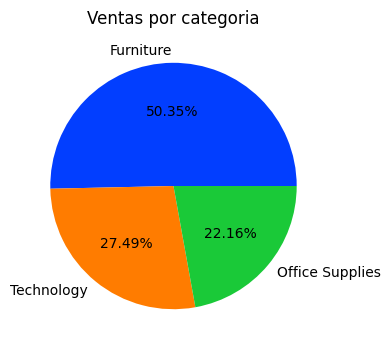

In [107]:
# Datos a graficar
mi_data = superstore[['Category','Sales']].groupby(by=['Category'], observed = False ).agg(
    {'Sales':'sum'}
).sort_values(by='Sales', ascending = False)


plt.figure(figsize=(8,4))
plt.title("Ventas por categoria")
# Seteo una paleta de colores
palette_color = sns.color_palette('bright') 

# Diseño de la grafica
plt.pie(mi_data['Sales'], labels=mi_data.index, colors=palette_color, autopct='%.2f%%') 
# Muestro la grafica
plt.show() 


*b. Grafique las ventas por región utilizando barras.*

Text(0, 0.5, 'Importe')

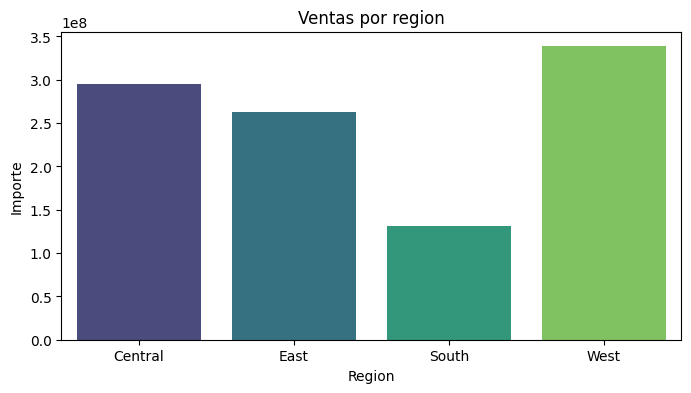

In [110]:
# Datos a graficar
mi_data = superstore[['Region','Sales']].groupby(by=['Region'], observed = False ).agg(
    {'Sales':'sum'}
).sort_values(by='Sales', ascending = False)


plt.figure(figsize=(8,4))
sns.barplot(data=mi_data,x=("Region"),y=("Sales"),hue="Region", errorbar=None, palette="viridis")
plt.title("Ventas por region")
plt.xlabel("Region")
plt.ylabel("Importe")
